**notebook version**: `3` (4 Jul 2024)  
**new in this version**: added check if downloaded data is indeed in 30MIN time resolution

- This notebook can be used to download data from the database `InfluxDB`
- Data are stored to a `.csv` file in this folder

Data from the datbase, but from the old bucket `CH-CHA_processing`.

# **Auto-settings**

## Data settings

In [1]:
DIRCONF = r'F:\Sync\luhk_work\20 - CODING\22 - POET\configs'
# DIRCONF = r'P:\Flux\RDS_calculations\_scripts\_configs\configs'  # Folder with configuration files: needed e.g. for connection to database
TIMEZONE_OFFSET_TO_UTC_HOURS = 1  # Timezone, e.g. "1" is translated to timezone "UTC+01:00" (CET, winter time)
REQUIRED_TIME_RESOLUTION = '30min'  # 30MIN time resolution

## Imports

In [2]:
import importlib.metadata
from datetime import datetime

%matplotlib inline
import seaborn as sns
from pathlib import Path
from diive.core.io.files import save_parquet

sns.set_theme('notebook')
from dbc_influxdb import dbcInflux
from diive.core.plotting.heatmap_datetime import HeatmapDateTime
import warnings

warnings.filterwarnings(action='ignore', category=FutureWarning)
warnings.filterwarnings(action='ignore', category=UserWarning)
dt_string = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
version_diive = importlib.metadata.version("diive")
print(f"diive version: v{version_diive}")
version_dbc = importlib.metadata.version("dbc_influxdb")
print(f"dbc-influxdb version: v{version_dbc}")
dbc = dbcInflux(dirconf=DIRCONF)  # Connect to database

diive version: v0.87.0
dbc-influxdb version: v0.13.1
Reading configuration files was successful.
Connection to database works.


</br>

# **DOWNLOAD** screened data from the database

In [3]:
%%time
data_simple, data_detailed, assigned_measurements = dbc.download(
    bucket=f'ch-fru_processed',
    measurements=['G', 'TA', 'SW', 'PPFD', 'LW', 'RH', 'PA', 'SWC', 'TS', 'PREC', 'RH'],
    fields=[
        'G_GF1_0.06_1',
        'G_GF1_0.06_2',
        'LW_IN_T1_1_1',
        'LW_OUT_T1_1_1',
        'PPFD_IN_T1_2_1',
        'PPFD_OUT_T1_2_1',
        'PREC_TOT_GF1_1_1',
        'PREC_TOT_T1_0.5_1',
        'RH_T1_2_1',
        'SW_IN_T1_1_1',
        'SW_OUT_T1_1_1',
        'SWC_GF1_0.05_1',
        'SWC_GF1_0.05_2',
        'SWC_GF1_0.15_1',
        'SWC_GF1_0.1_2',
        'SWC_GF1_0.25_1',
        'SWC_GF1_0.2_2',
        'SWC_GF1_0.3_2',
        'SWC_GF1_0.4_1',
        'SWC_GF1_0.4_2',
        'SWC_GF1_0.5_2',
        'SWC_GF1_0.6_2',
        'SWC_GF1_0.75_2',
        'SWC_GF1_0.95_1',
        'SWC_GF1_1_2',
        'TA_T1_2_1',
        'TS_GF1_0.01_1',
        'TS_GF1_0.04_1',
        'TS_GF1_0.05_2',
        'TS_GF1_0.07_1',
        'TS_GF1_0.15_1',
        'TS_GF1_0.1_1',
        'TS_GF1_0.1_2',
        'TS_GF1_0.25_1',
        'TS_GF1_0.2_2',
        'TS_GF1_0.3_2',
        'TS_GF1_0.4_1',
        'TS_GF1_0.4_2',
        'TS_GF1_0.5_2',
        'TS_GF1_0.6_2',
        'TS_GF1_0.75_2',        
        'TS_GF1_0.95_1',
        'TS_GF1_1_2',        
    ],
    start='2021-01-01 00:00:01',  # Download data starting with this date (the start date itself IS included),
    stop='2025-01-01 00:00:01',  # Download data before this date (the stop date itself IS NOT included),
    timezone_offset_to_utc_hours=TIMEZONE_OFFSET_TO_UTC_HOURS,
    data_version='meteoscreening_diive'
)


DOWNLOADING
    from bucket ch-fru_processed
    variables ['G_GF1_0.06_1', 'G_GF1_0.06_2', 'LW_IN_T1_1_1', 'LW_OUT_T1_1_1', 'PPFD_IN_T1_2_1', 'PPFD_OUT_T1_2_1', 'PREC_TOT_GF1_1_1', 'PREC_TOT_T1_0.5_1', 'RH_T1_2_1', 'SW_IN_T1_1_1', 'SW_OUT_T1_1_1', 'SWC_GF1_0.05_1', 'SWC_GF1_0.05_2', 'SWC_GF1_0.15_1', 'SWC_GF1_0.1_2', 'SWC_GF1_0.25_1', 'SWC_GF1_0.2_2', 'SWC_GF1_0.3_2', 'SWC_GF1_0.4_1', 'SWC_GF1_0.4_2', 'SWC_GF1_0.5_2', 'SWC_GF1_0.6_2', 'SWC_GF1_0.75_2', 'SWC_GF1_0.95_1', 'SWC_GF1_1_2', 'TA_T1_2_1', 'TS_GF1_0.01_1', 'TS_GF1_0.04_1', 'TS_GF1_0.05_2', 'TS_GF1_0.07_1', 'TS_GF1_0.15_1', 'TS_GF1_0.1_1', 'TS_GF1_0.1_2', 'TS_GF1_0.25_1', 'TS_GF1_0.2_2', 'TS_GF1_0.3_2', 'TS_GF1_0.4_1', 'TS_GF1_0.4_2', 'TS_GF1_0.5_2', 'TS_GF1_0.6_2', 'TS_GF1_0.75_2', 'TS_GF1_0.95_1', 'TS_GF1_1_2']
    from measurements ['G', 'TA', 'SW', 'PPFD', 'LW', 'RH', 'PA', 'SWC', 'TS', 'PREC', 'RH']
    from data version ['meteoscreening_diive']
    between 2021-01-01 00:00:01 and 2025-01-01 00:00:01
    with timezone off

In [4]:
data_simple

G_GF1_0.06_1  G_GF1_0.06_2  LW_IN_T1_1_1  LW_OUT_T1_1_1  PPFD_IN_T1_2_1  PPFD_OUT_T1_2_1  PREC_TOT_GF1_1_1  PREC_TOT_T1_0.5_1  RH_T1_2_1  SWC_GF1_0.05_1  SWC_GF1_0.05_2  SWC_GF1_0.15_1  SWC_GF1_0.1_2  SWC_GF1_0.25_1  SWC_GF1_0.2_2  ...  TS_GF1_0.05_2  TS_GF1_0.07_1  TS_GF1_0.15_1  TS_GF1_0.1_1  TS_GF1_0.1_2  TS_GF1_0.25_1  TS_GF1_0.2_2  TS_GF1_0.3_2  TS_GF1_0.4_1  TS_GF1_0.4_2  TS_GF1_0.5_2  TS_GF1_0.6_2  TS_GF1_0.75_2  TS_GF1_0.95_1  TS_GF1_1_2
TIMESTAMP_END                                                                                                                                                                                                                                                ...                                                                                                                                                                                                                      
2021-01-01 00:30:00     -6.887082     -8.630404    285.659340     292.033183             0.0              0.0               NaN                0.0  54.829798       57.757180             NaN       48.892675            NaN       52.328157            NaN  ...            NaN       1.628083       1.750629           NaN      1.652278       2.579931      2.206667      2.727833      3.158559           NaN      3.491056           NaN            NaN       4.505392    5.140111
2021-01-01 01:00:00     -6.881727     -8.593153    276.304473     289.757377             0.0              0.0               NaN                0.0  58.174412       57.748287             NaN       48.893477            NaN       52.325673            NaN  ...            NaN       1.622893       1.747853           NaN      1.651207       2.575691      2.203678      2.724253      3.152399           NaN      3.490172           NaN            NaN       4.501024    5.142586
2021-01-01 01:30:00     -6.860665     -8.571210    266.556937     282.779523             0.0              0.0               NaN                0.0  71.878856       57.746917             NaN       48.891679            NaN       52.325026            NaN  ...            NaN       1.622331       1.747667           NaN      1.650988       2.573988      2.200926      2.719136      3.154748           NaN      3.489630           NaN            NaN       4.498686    5.148580
2021-01-01 02:00:00     -6.850413     -8.579524    283.767490     288.579233             0.0              0.0               NaN                0.0  84.227086       57.744498             NaN       48.896227            NaN       52.322758            NaN  ...            NaN       1.621771       1.745108           NaN      1.650889       2.572263      2.199278      2.726000      3.152439           NaN      3.490111           NaN            NaN       4.497496    5.136444
2021-01-01 02:30:00     -6.840737     -8.568706    288.668837     292.348167             0.0              0.0               NaN                0.0  92.468086       57.743355             NaN       48.893252            NaN       52.326046            NaN  ...            NaN       1.619655       1.743779           NaN      1.651333       2.570895      2.196167      2.719111      3.150649           NaN      3.490333           NaN            NaN       4.494951    5.141333
...                           ...           ...           ...            ...             ...              ...               ...                ...        ...             ...             ...             ...            ...             ...            ...  ...            ...            ...            ...           ...           ...            ...           ...           ...           ...           ...           ...           ...            ...            ...         ...
2024-12-31 22:00:00     -6.896756     -6.284012    227.565077     265.189837             0.0              0.0               0.0                NaN  49.185175       61.780803       43.926217       51.267053      42.232317       50.217804      36.665633  

## Plot downloaded data

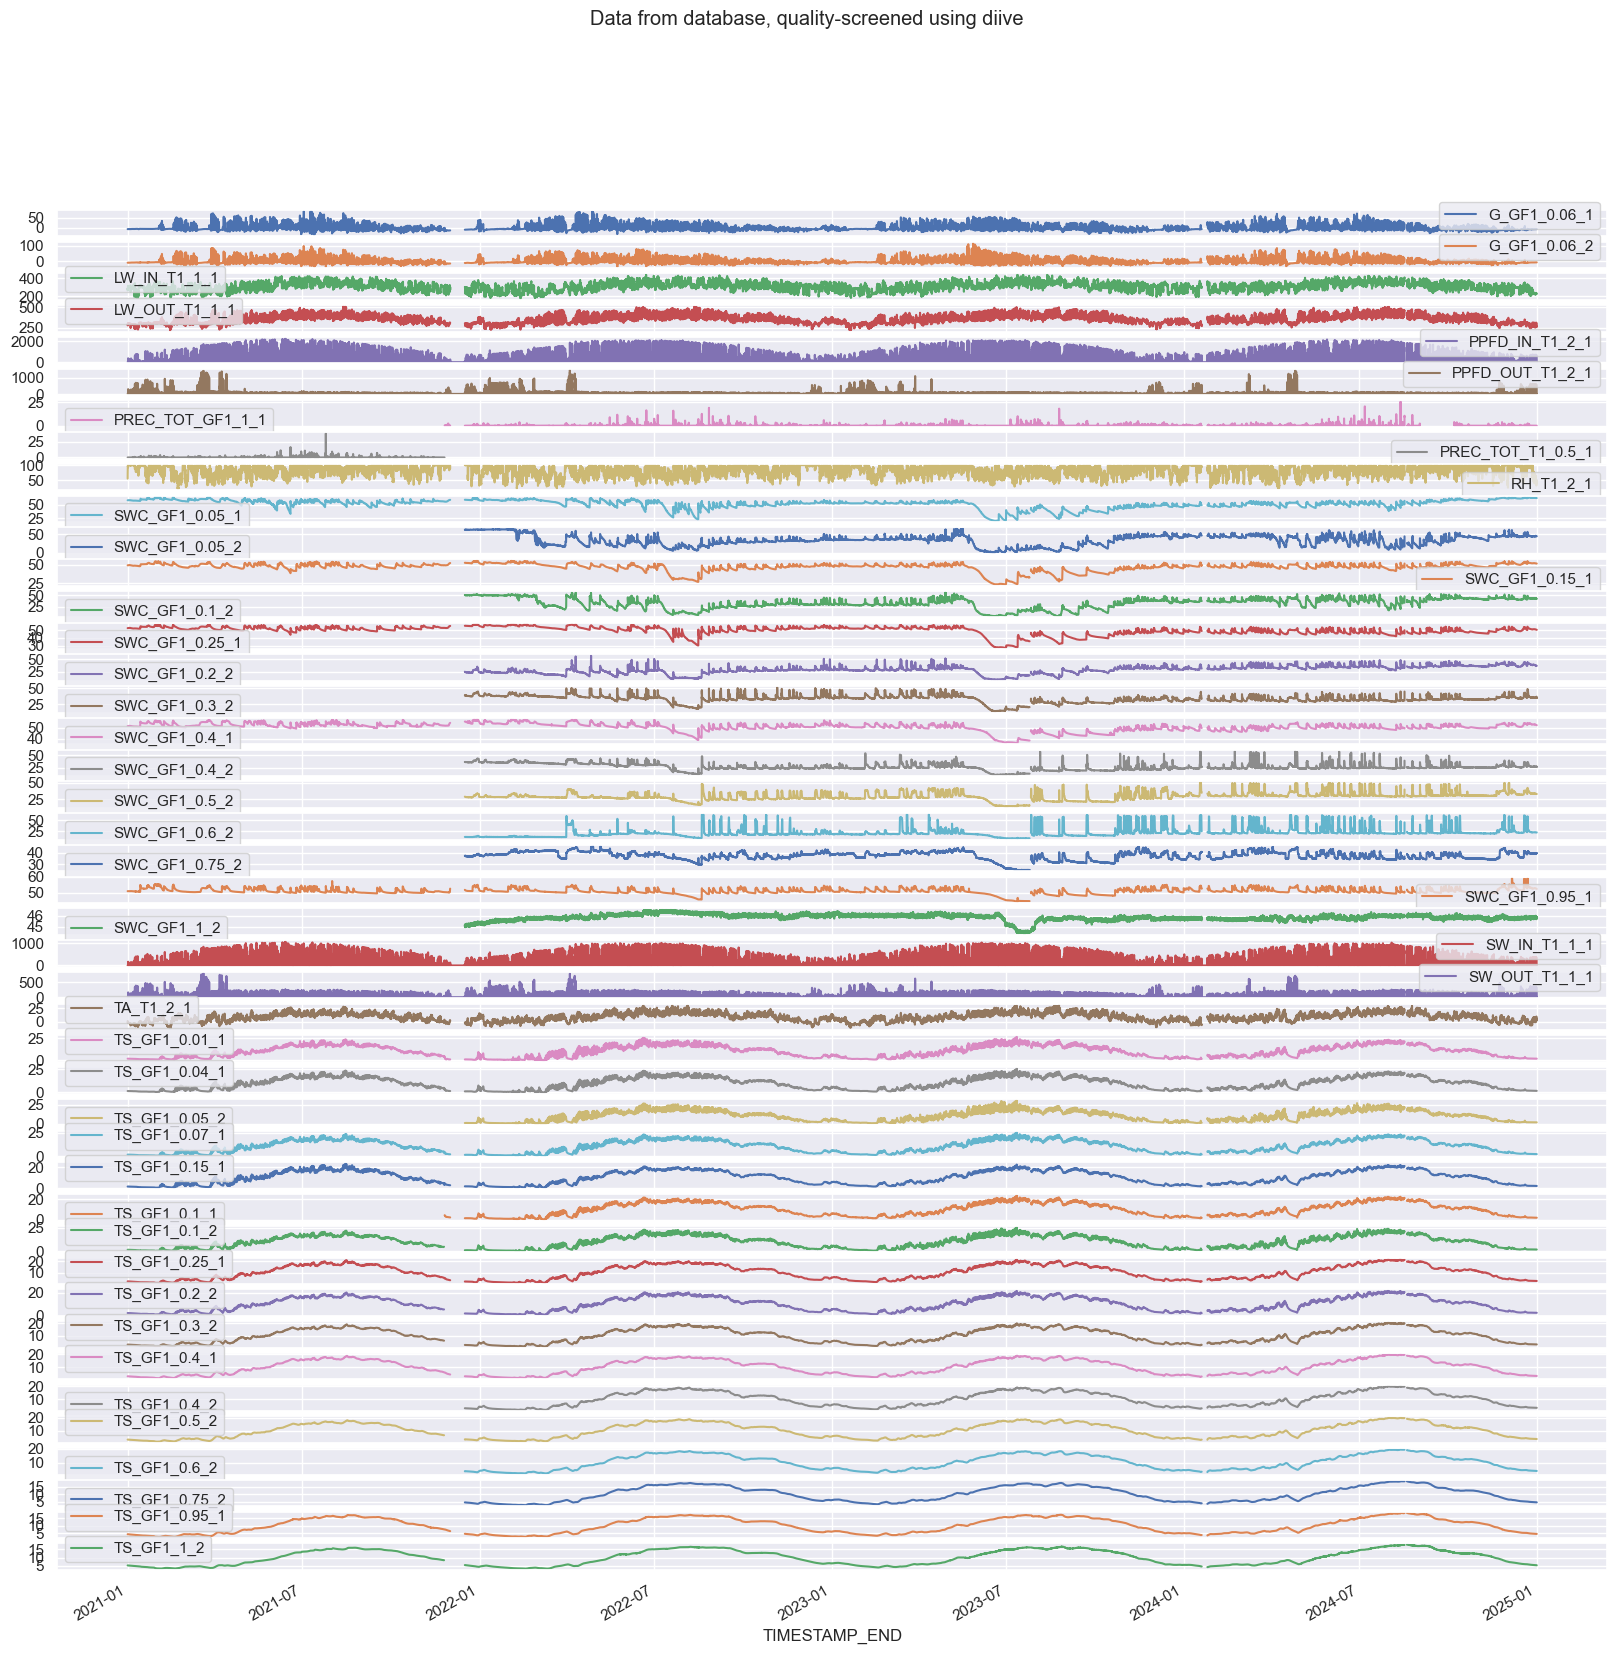

In [5]:
data_simple.plot(subplots=True, x_compat=True, title="Data from database, quality-screened using diive", figsize=(20, 20));

</br>

# **SAVE TO FILE**

In [6]:
OUTNAME = "12.1_CH-CHA_DATABASE_meteo_2021-2024"
OUTPATH = r""
filepath = save_parquet(filename=OUTNAME, data=data_simple, outpath=OUTPATH)
# data_simple.to_csv(Path(OUTPATH) / f"{OUTNAME}.csv")

Saved file 12.1_CH-CHA_DATABASE_meteo_2021-2024.parquet (0.184 seconds).


</br>

## Heatmaps

F:\Sync\luhk_work\20 - CODING\21 - DIIVE\diive\diive\core\plotting\heatmap_base.py:208: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(facecolor='white', figsize=self.figsize)


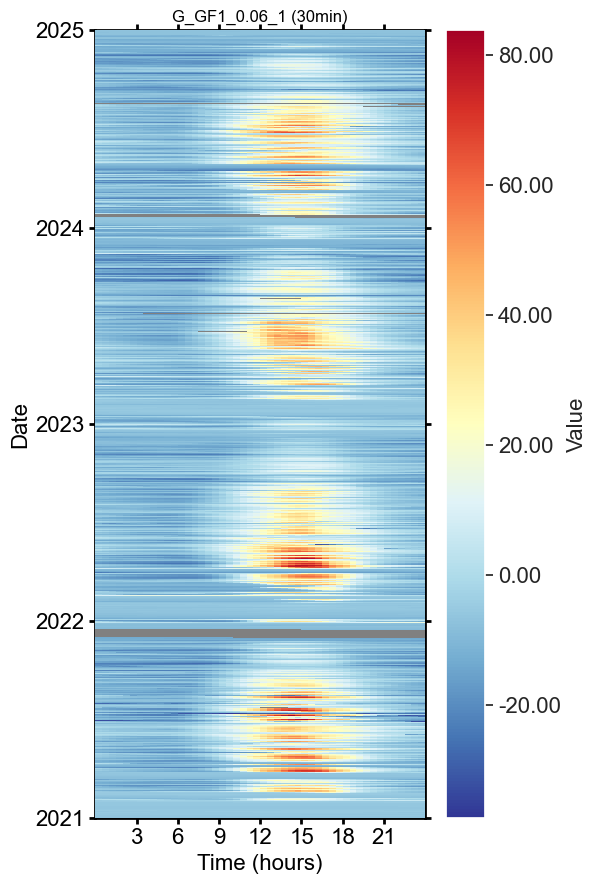

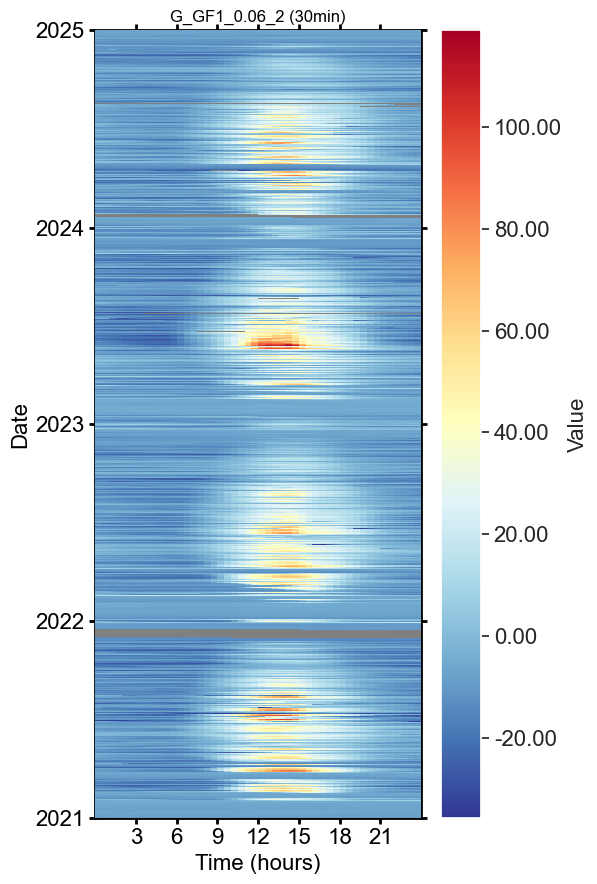

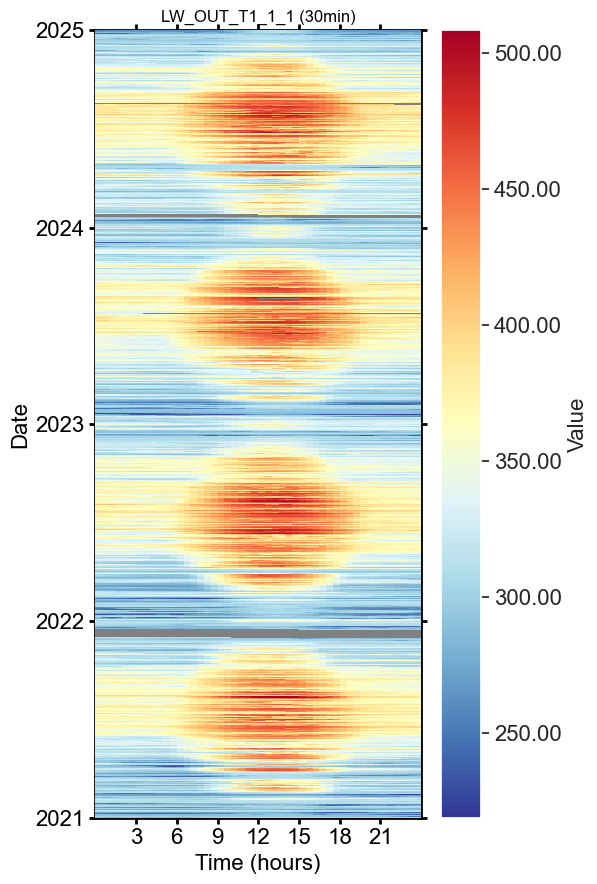

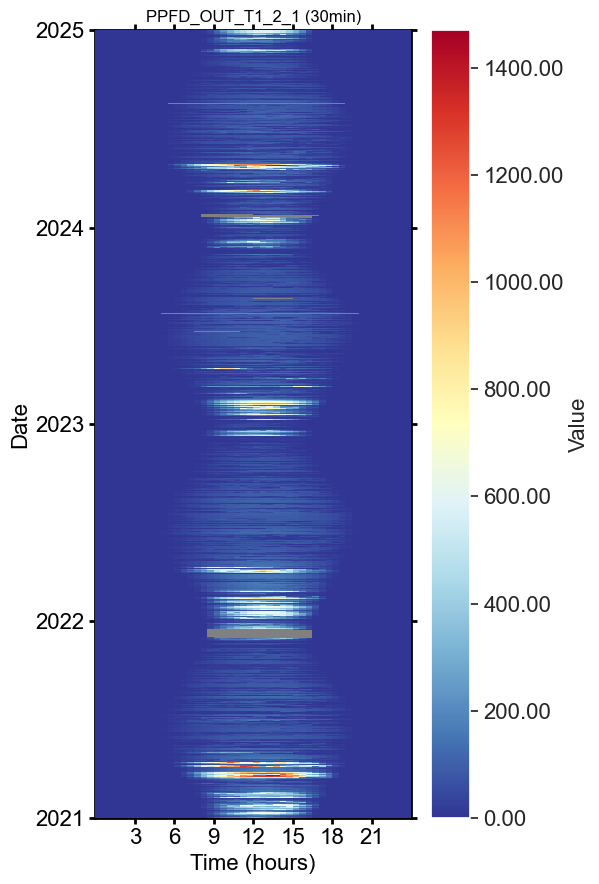

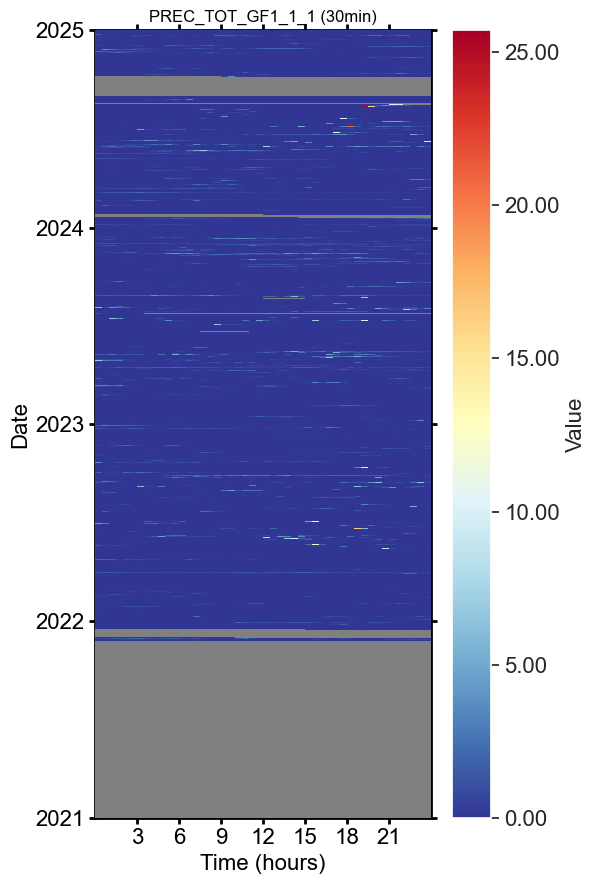

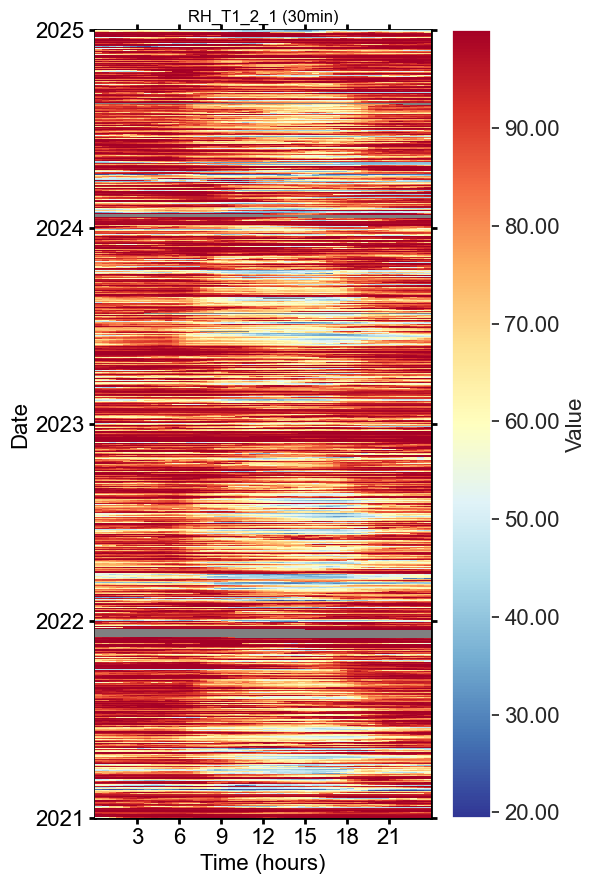

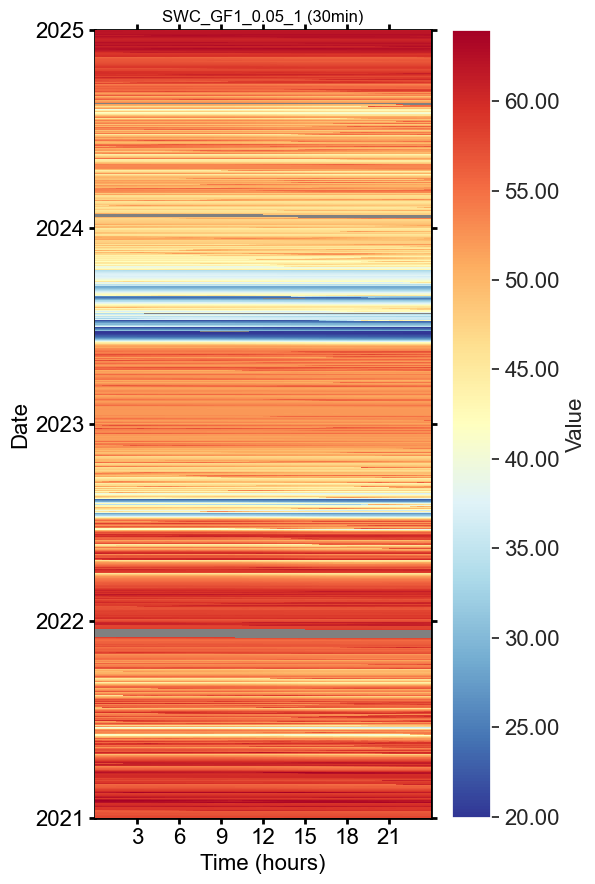

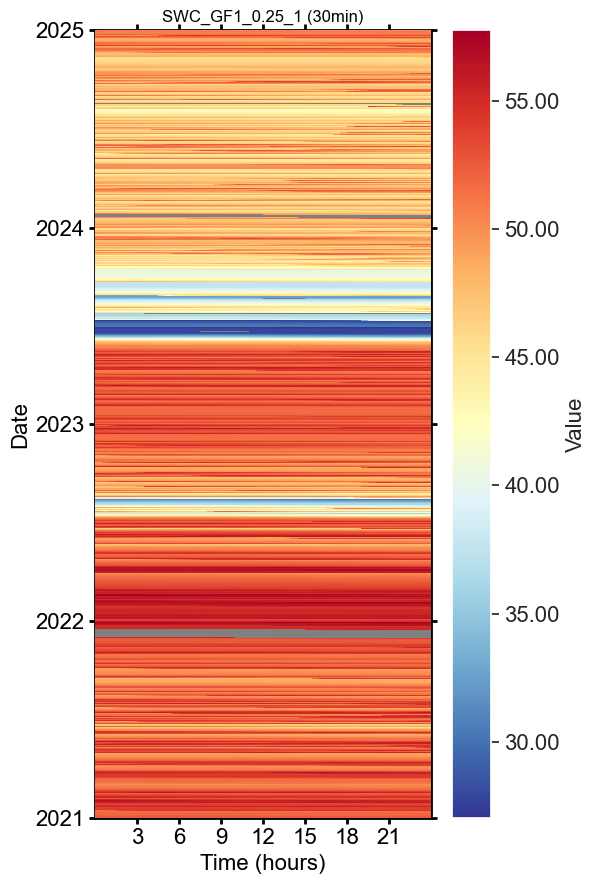

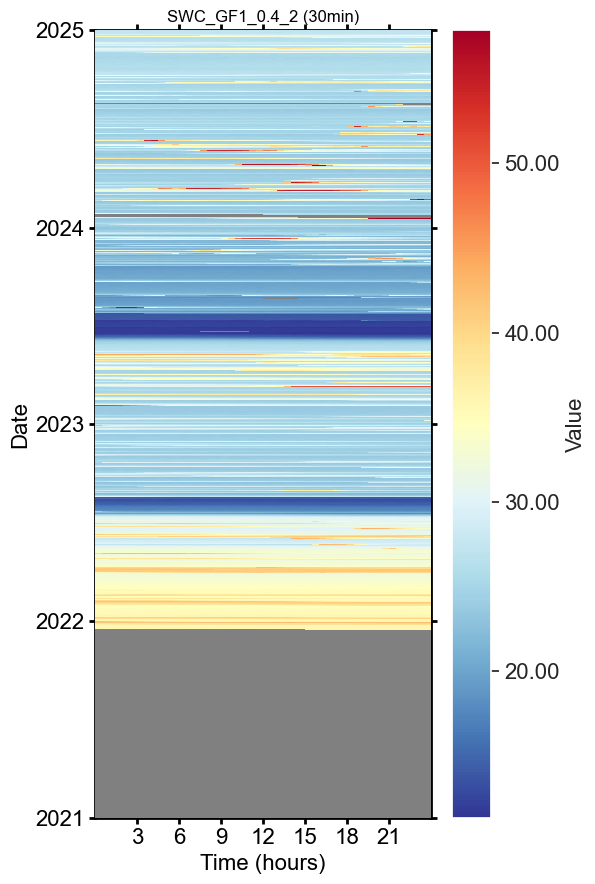

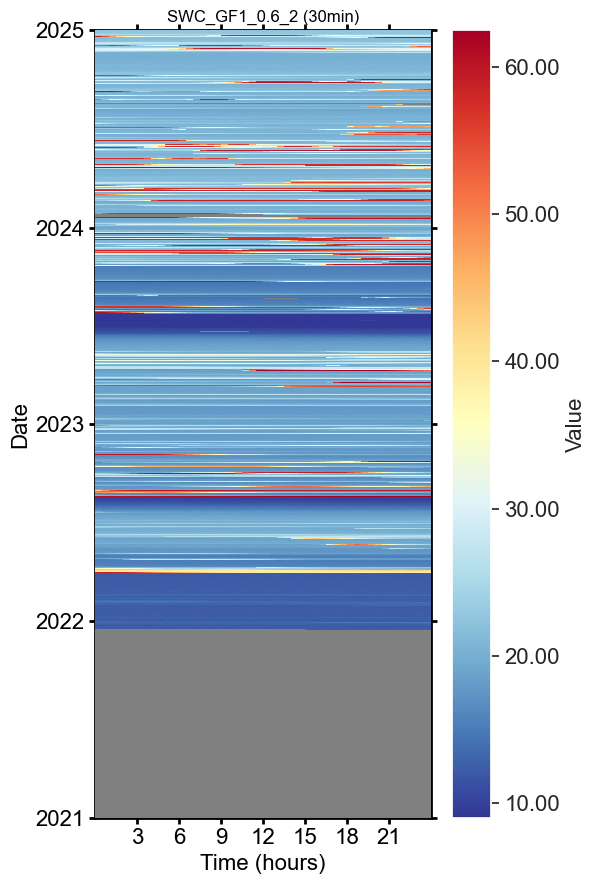

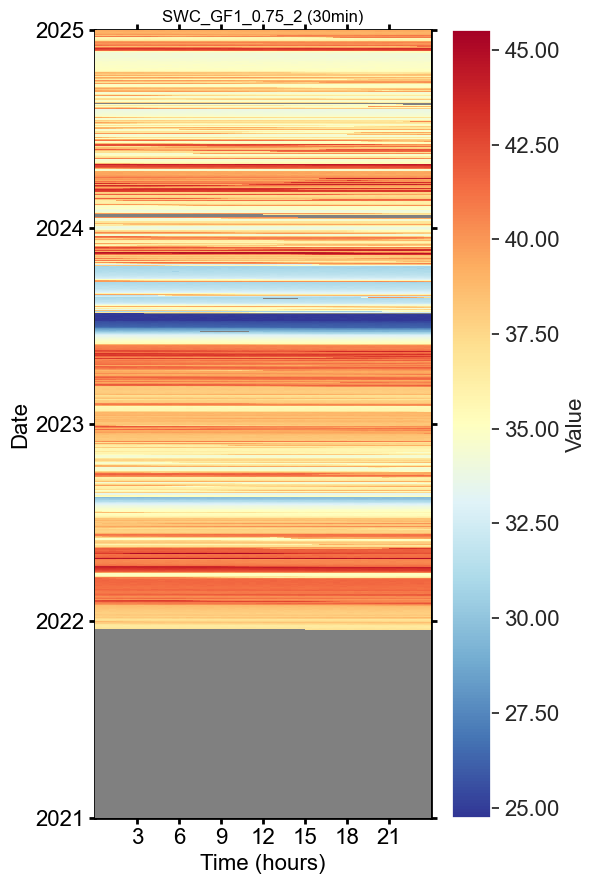

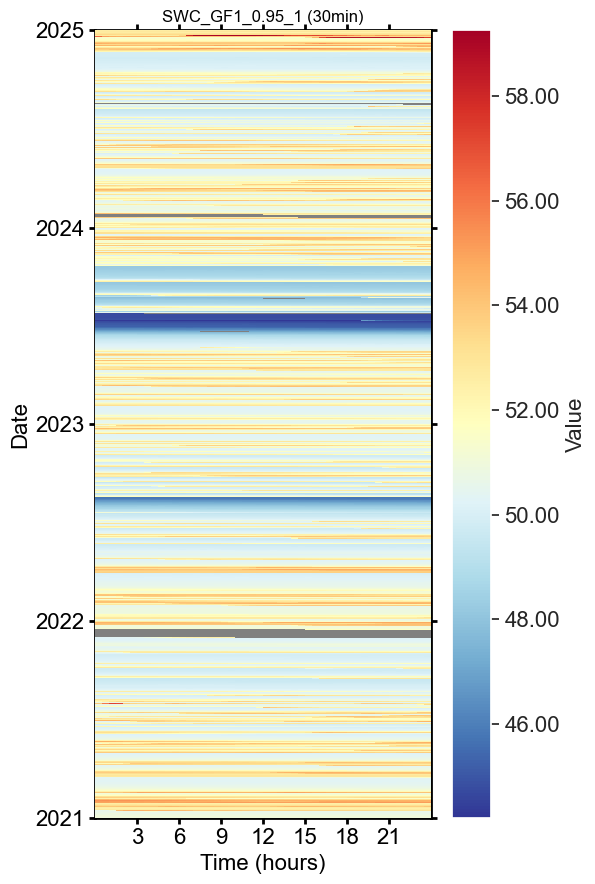

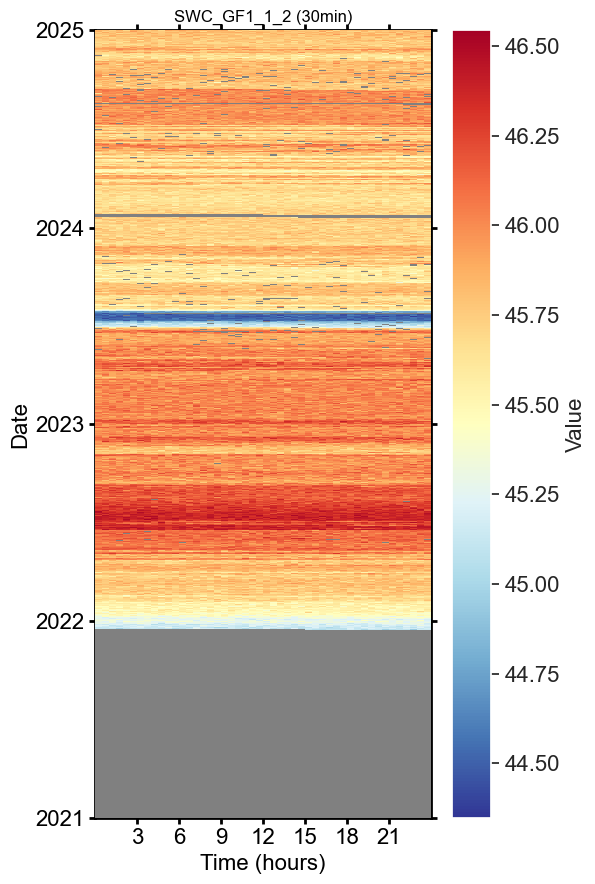

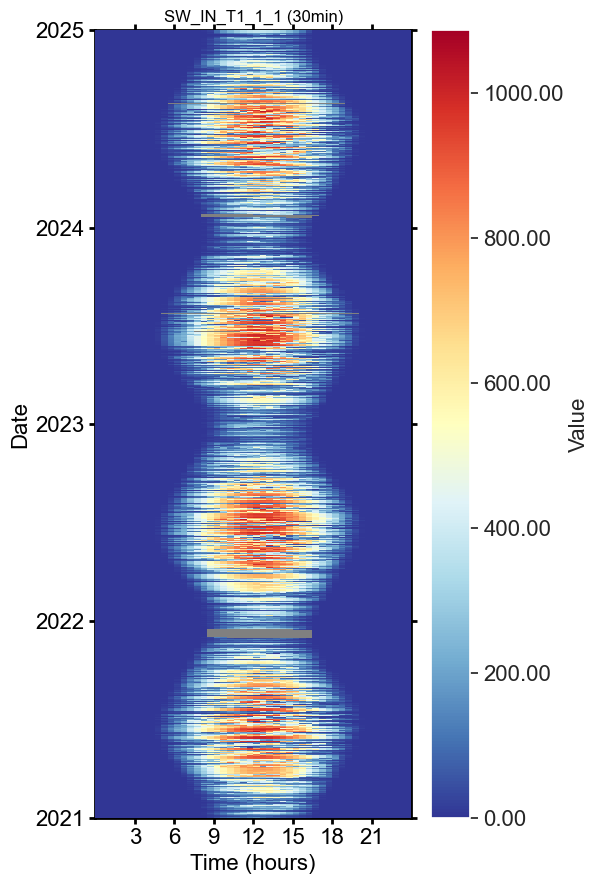

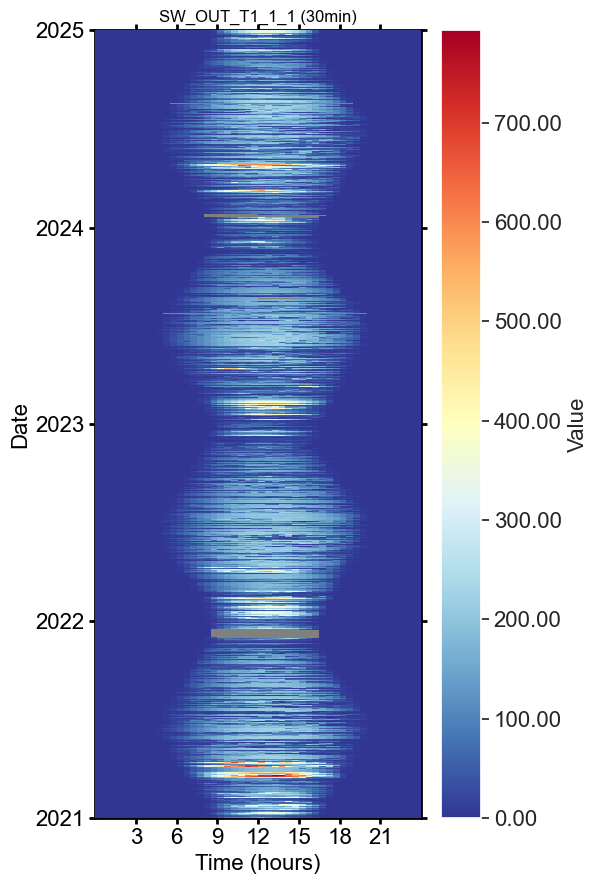

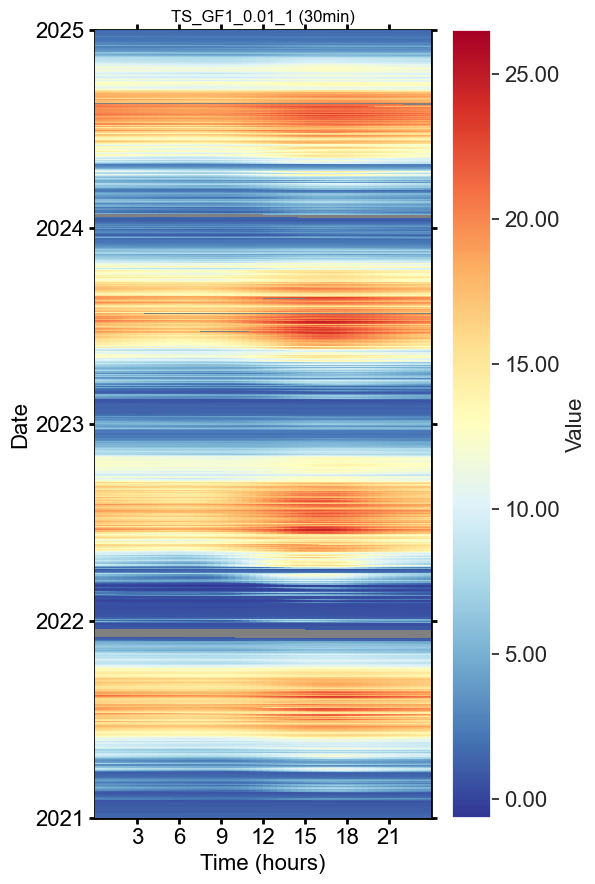

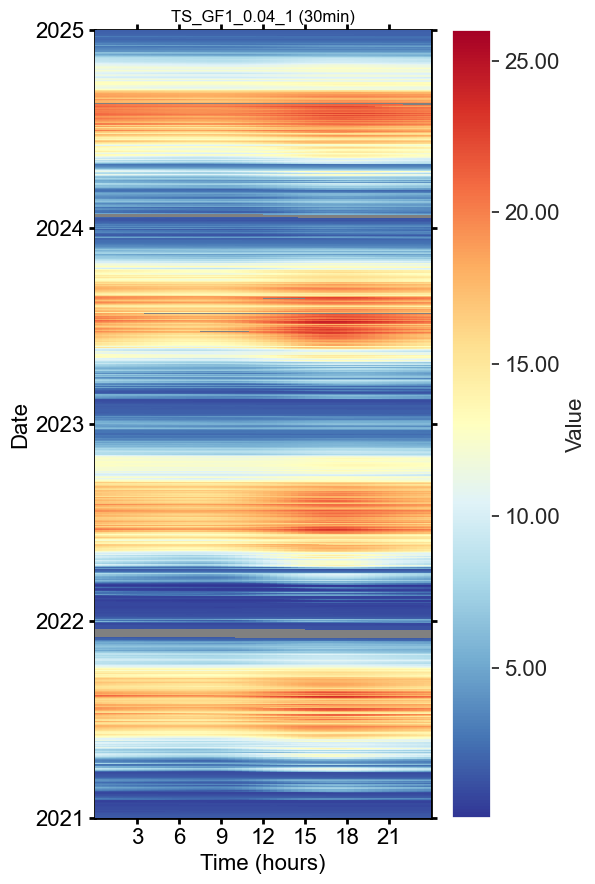

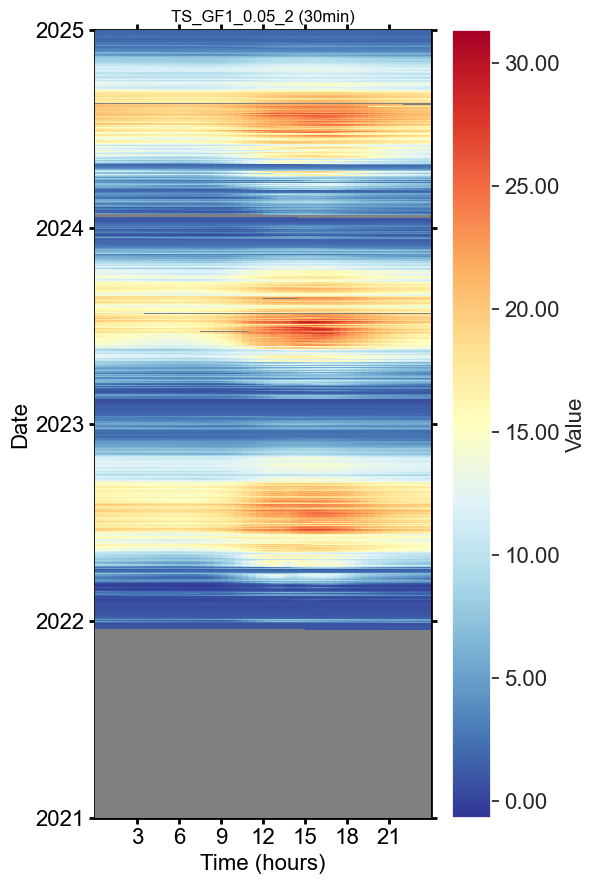

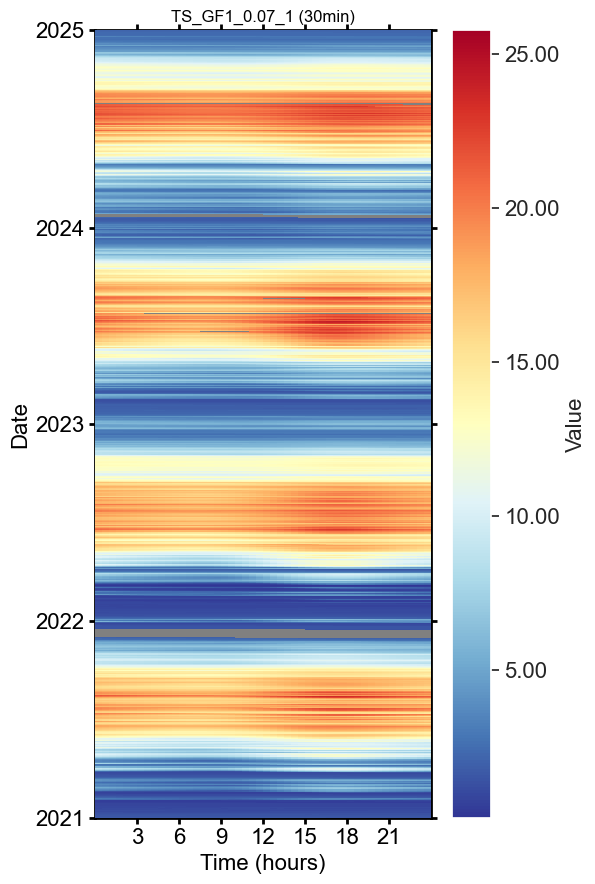

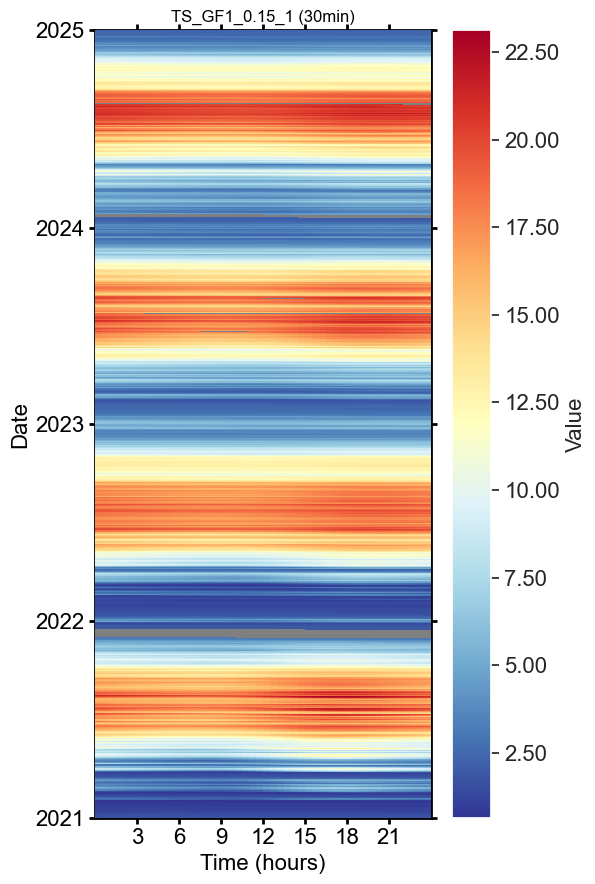

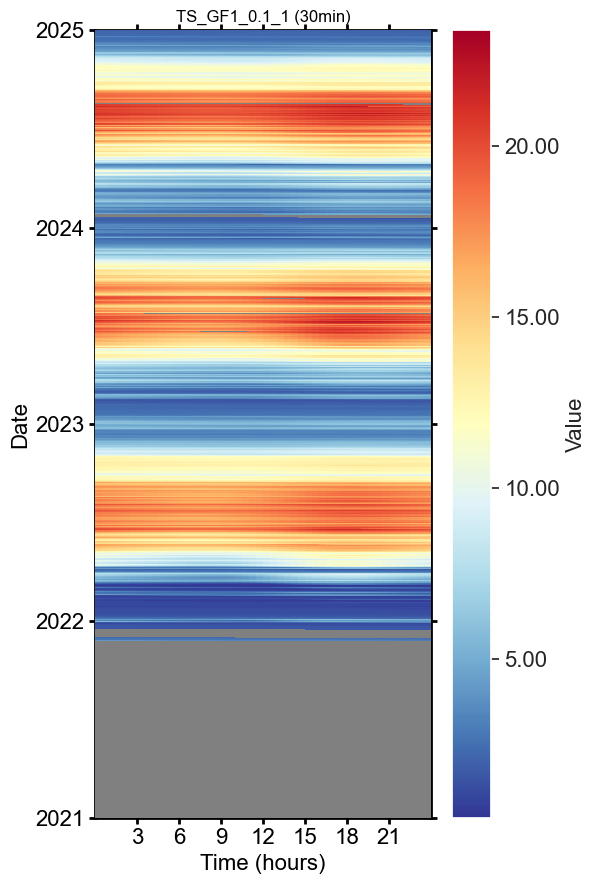

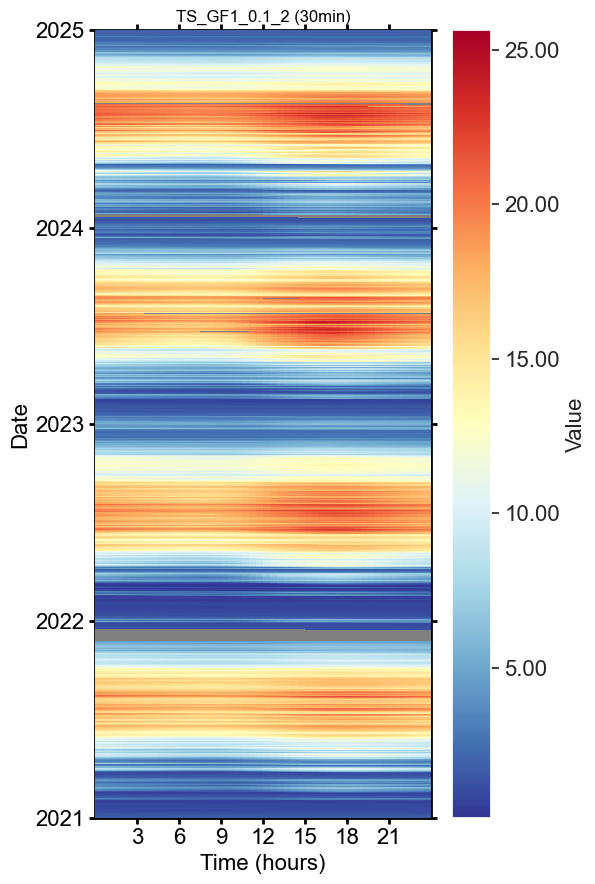

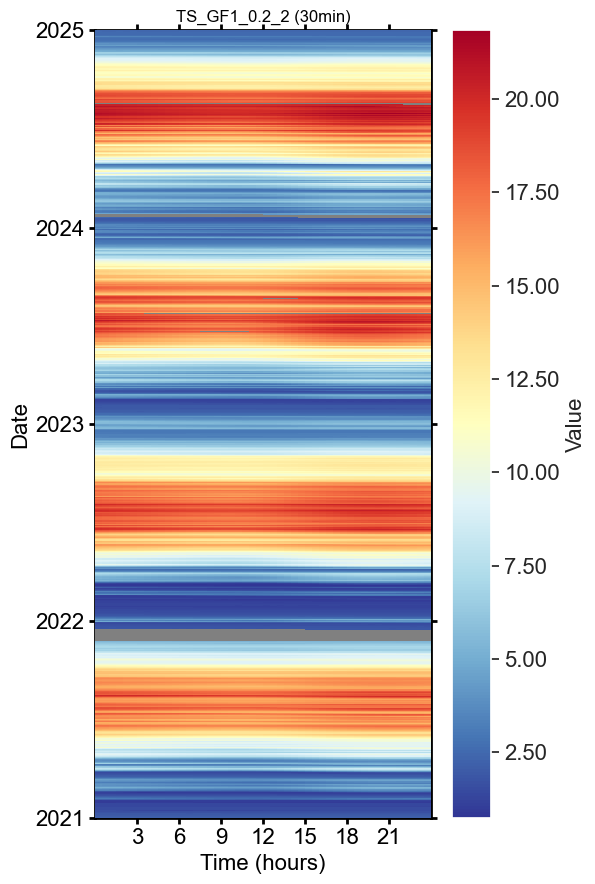

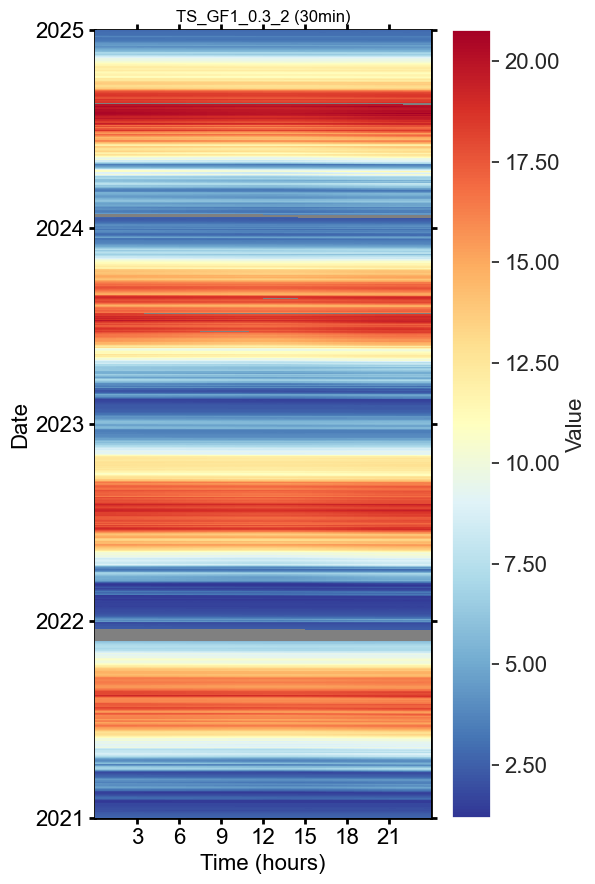

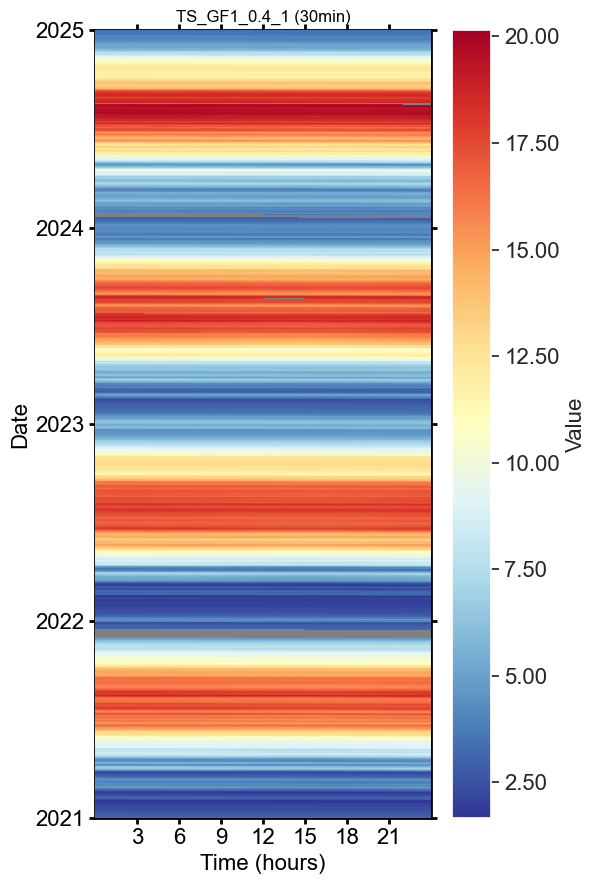

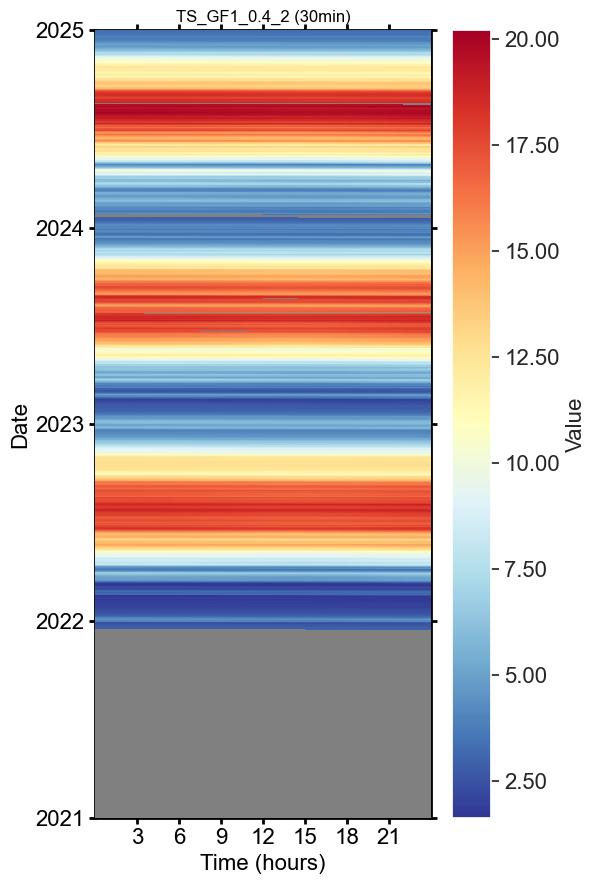

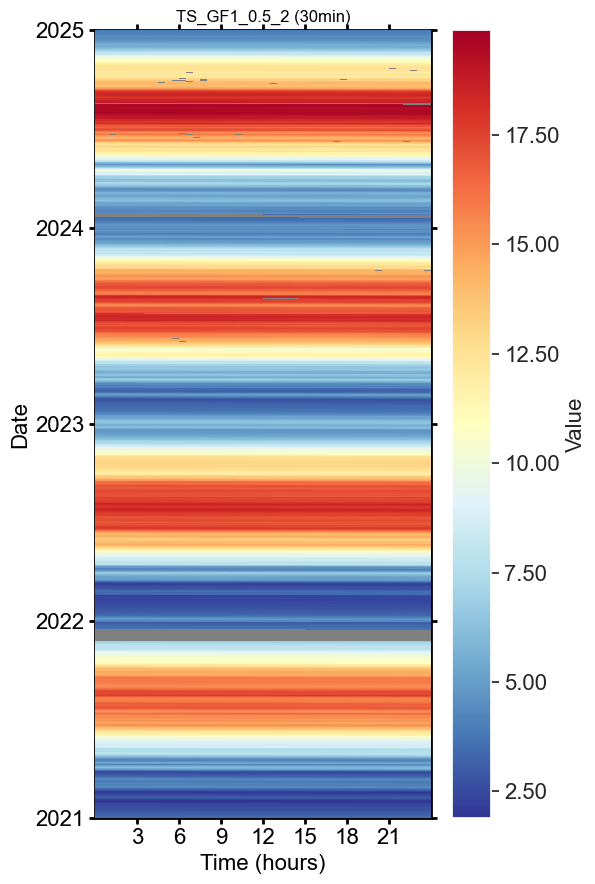

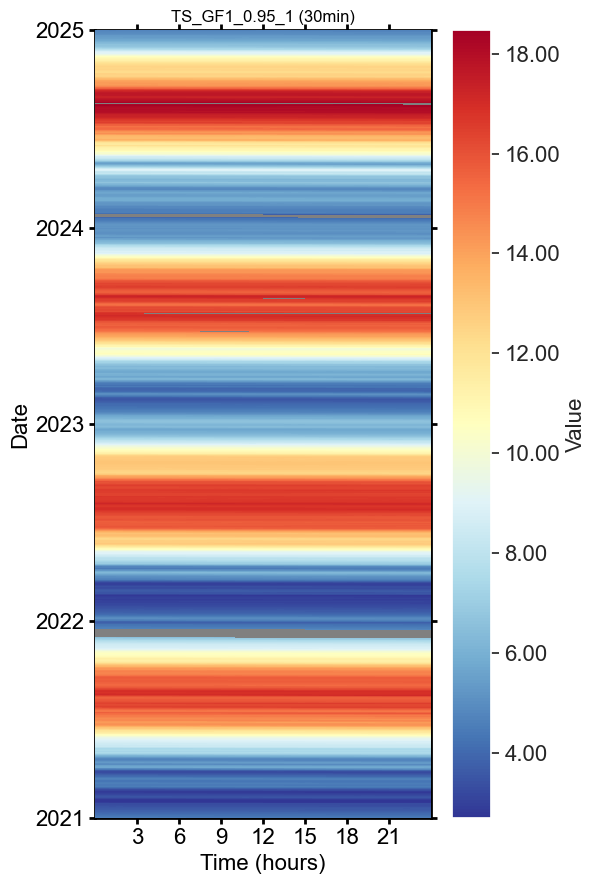

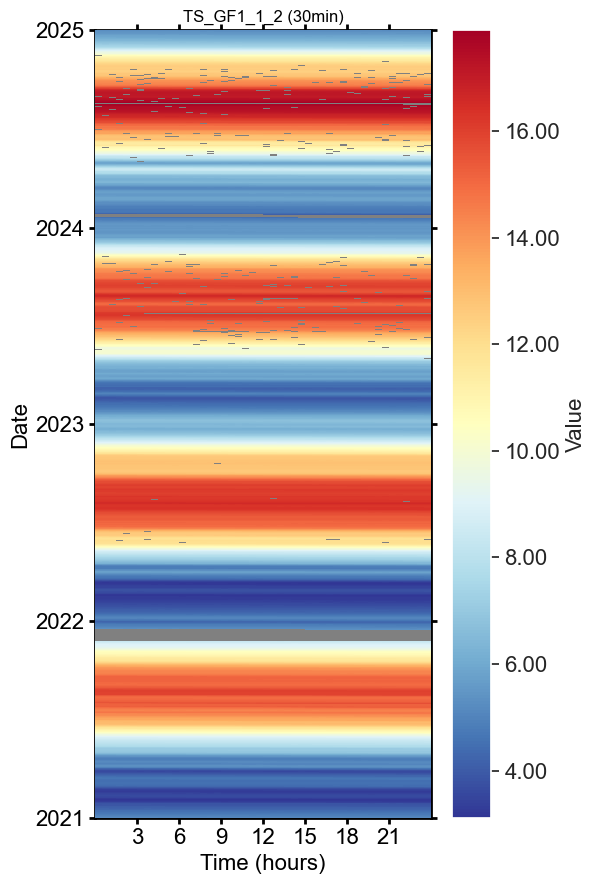

In [7]:
for col in data_simple.columns:
    series = data_simple[col]
    series.name = col
    HeatmapDateTime(series, figsize=(6, 9)).show()

</br>

# **Stats**

In [8]:
data_simple.describe()

G_GF1_0.06_1  G_GF1_0.06_2  LW_IN_T1_1_1  LW_OUT_T1_1_1  PPFD_IN_T1_2_1  PPFD_OUT_T1_2_1  PREC_TOT_GF1_1_1  PREC_TOT_T1_0.5_1     RH_T1_2_1  SWC_GF1_0.05_1  SWC_GF1_0.05_2  SWC_GF1_0.15_1  SWC_GF1_0.1_2  SWC_GF1_0.25_1  SWC_GF1_0.2_2  ...  TS_GF1_0.05_2  TS_GF1_0.07_1  TS_GF1_0.15_1  TS_GF1_0.1_1  TS_GF1_0.1_2  TS_GF1_0.25_1  TS_GF1_0.2_2  TS_GF1_0.3_2  TS_GF1_0.4_1  TS_GF1_0.4_2  TS_GF1_0.5_2  TS_GF1_0.6_2  TS_GF1_0.75_2  TS_GF1_0.95_1    TS_GF1_1_2
count  68884.000000  68870.000000  68905.000000   68905.000000    69646.000000     69646.000000      51430.000000       15767.000000  68905.000000    68905.000000    52858.000000    68905.000000   52858.000000    68905.000000   52858.000000  ...   52858.000000   68905.000000   68905.000000  53138.000000  68600.000000   68905.000000  68600.000000  68600.000000  68905.000000  52858.000000  68564.000000  52858.000000   52857.000000   68905.000000  68042.000000
mean      -1.606143     -0.909837    311.527675     350.695220      296.197533        37.031474          0.096315           0.106590     81.823438       51.061598       32.736628       46.398400      32.024883       49.293914      28.888336  ...      10.058127      10.168224      10.038850      9.950559      9.821878      10.305508      9.860264      9.895499     10.075050     10.087594     10.180301     10.328652      10.067405      10.040207      9.873861
std       13.717759     15.426299     46.159063      47.236782      492.751701       102.382423          0.505758           0.606911     17.375651        8.033006       14.032713        5.627493      11.356452        5.380692       7.253994  ...       6.861597       6.472353       6.113415      6.162990      6.408790       5.964642      6.050804      5.783886      5.506248      5.602243      5.365628      5.180444       4.903469       4.800138      4.498202
min      -37.473936    -35.741029    172.159687     218.637617        0.000000         0.000000          0.000000           0.000000     19.417533       19.928273        0.424114       23.348222       3.945449       27.026562       9.614412  ...      -0.711102       0.193505       0.641624      0.339774      0.129228       1.234794      0.735325      1.182691      1.657271      1.630548      1.890222      2.444618       2.547015       2.701250      3.111858
25%       -9.881033    -10.026674    282.612863     312.732450        0.000000         0.000000          0.000000           0.000000     69.852581       47.661063       22.812528       45.387803      26.058417       46.913316      25.033123  ...       3.467755       3.972248       4.185394      4.033072      3.685446       4.504260      4.024031      4.245221      4.735123      4.681749      5.002063      5.352996       5.380666       5.391697      5.503020
50%       -5.853309     -5.714636    315.265027     346.520417        4.147746         0.383338          0.000000           0.000000     86.630203       52.532818       34.224525       47.597249      33.743733       50.612790      29.454865  ...      10.015113      10.046962       9.859647      9.973539      9.661942       9.978489      9.613876      9.647107      9.821896      9.825343      9.874203     10.155842       9.980164       9.876709      9.677145
75%        2.759617      3.682683    344.536853     380.282537      400.615648        37.915284          0.000000           0.000000     97.423519       56.596256       42.787673       49.702805      40.607025       52.767207      33.891664  ...      16.045933      16.310423      15.956209     15.870120     15.794349      16.197283     15.746922     15.568226     15.578696     15.414028     15.322980     15.217310      14.753333      14.784433     14.381056
max       83.782477    118.972087    441.692857     508.376343     2309.779400      1469.430181         25.700000          38.600000     99.997990       63.955414       64.080120       55.502728      56.380660       57.736074      56.491203  ...      31.309233      25.774217      23.120488     23.397060     25

</br>

# **End of notebook**.

In [9]:
dt_string = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
print(f"Finished. {dt_string}")

Finished. 2025-04-21 20:20:12


</br>